# Análise de Aglomerados (Cluster)


Conjunto de técnicas multivariadas cujo objetivo principal é **agrupar objetos ou indivíduos baseado nas características que eles possuem**.

Os objetos em um mesmo aglomerado (cluster) apresentam **similaridade entre si** (alta homogeneidade interna no grupo) e **diferem dos objetos em outros aglomerados**(heterogeneidade externa / entre grupos).

Os objetos podem ser: *respondentes, produtos, empresas, ou outras entidades*.

A análise de aglomerados também tem sido chamada de Q-analysis, Tipologia, Análise de classificação e taxonomia numérica.

A variedade de nomes deve-se ao uso da análise de aglomerados em disciplinas muito diversas.

É adequada para a classificação dos dados respeitando a natureza dos grupos existentes.

Como a análise fatorial (factor analysis), é exploratória e busca acessar a natureza dos dados, nas é diferente da análise fatorial, já que **a análise de aglomerados agrupa objetos**, enquanto que **a análise fatorial agrupa variáveis**.

Pode ser usada para:
- Identificar grupos de usuários / consumidores.
- Mineração de dados (classificar, distribuir e identificar características).
- Classificação (clientes, comportamentos, plantas, animais).
- Identificação e reconhecimento de padrões.

A aplicação da técnica consiste em 5 passos:
1. Análise das variáveis e dos objetos a serem agrupados (seleção das variáveis e padronização).
2. Seleção da medida de distância ou similaridade.
3. Seleção do algoritmo de agrupamento (hierárquico ou não hierárquico).
4. Escolha da quantidade de agrupamentos formados.
5. Interpretação e validação dos agrupamentos.

## Análise das variáveis e dos objetos a serem agrupados

Deve-se escolher as variáveis que serão incluídas no estudo. Critérios de inclusão / exclusão devem considerar:
- A técnica não distingue se variáveis são ou não relevantes ao estudo.
- A técnica é altamente sensível a inclusão de variáveis com a presença de outliers.
- Variáveis com medidas/escalas diferentes podem distorcer a estrutura dos agrupamentos.
- As medidas de distância tendem a sofrer influencia das diferentes escalas/magnitudes das variáveis.
- Deve-se fazer a padronização das variáveis para os Z-scores quando os dados apresentarem valores muito discrepantes (ex.: 10 e 10000).

## Seleção da Medida de Distância ou Similaridade

As medidas de distância são consideradas medidas de dissimilaridades, pois **quanto maiores os valores menor é a semelhança entre os objetos**.

As principais medidas de distância encontradas na literatura são:
- **Distância Euclidiana**
- **Distância Quadrática Euclidiana** (mais utilizada)
- Distância de Minkoski
- Distância Absoluta, Bloco, City-Block ou Manhattan
- **Distância de Mahalanobis**
- Distância de Chebychev
- Medida de Jaccard (p/ dados binários onde dados ausentes não são importantes).


## Seleção do algoritmo de Agrupamento

**Método Hierárquico**:
- **Aglomerativo**: cada elemento começa com o seu agrupamento e novos agrupamentos são realizados por similaridade (evolui da esquerda para a direita). 
- **Divisivo**: os elementos começam em um grande agregado e são separados até identificar os agrupamentos.

Os métodos aglomerativo e divisivo são teoricamente equivalentes.

O critério essencial de todos os algoritmos é maximizar a distância entre os aglomerados, comparada às variações dentro dos aglomerados.

Métodos mais frequentes:
- Menor Distância ou Ligação Individual (Single Linkage ou Nearest Neighbor). 
- **Maior Distância ou Ligação Completa** (Complete Linkage ou Furhest Neighbor). 
- Distância Média ou Ligação Média (Average Linkage ou Between Groups): tende a formar aglomerados com aproximadamente a mesma variância interna.
- Centroide (Centroid): pode gerar resultados confusos, pois quando se agrupa dois aglomerados, o centróide se altera e isso pode modificar decisões anteriores; é menos afetado por dados atípicos.
- Ward: busca minimizar a variância interna entre os elementos do agrupamento; tende a formar aglomerados com, aproximadamente, o mesmo número de indivíduos.

**Método Não-Hierárquico**:

Número inicial de clusters é definido pelo pesquisador. 

Processo dinâmico e interativo com objetivo de identificar a melhor solução.

Os procedimentos não hierárquicos são métodos que tem como objetivo encontrar uma partição de n elementos em K grupos (clusters).




##Escolha da quantidade de agrupamentos formados

Decisão do Pesquisador.

Pode ser auxiliada por:
- Dendogramas
- Silhouette index


##Interpretação e validação dos agrupamentos

# Exemplo de Análise de Cluster Hierárquico

Foi realizado um levantamento com 157 veículos no mercado Americano no ano de 2014. 

Foram identificadas variáveis relacionadas a vendas, preço de revenda, potencia, peso e eficiência (milhas/galão). 

O objetivo da pesquisa é identificar grupos homogêneos de veículos que apresentem um comportamento semelhante em relação a potência e peso.

**Identifique grupos homogêneos de veículos com capacidade semelhante de motor e potência**, para posteriormente relacionar com vendas e preço de revenda.

In [ ]:
!pip install pingouin

# Bibliotecas a serem importadas nesta análise
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import pingouin as pg

from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Permitir acesso ao Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ler os dados
import pandas as pd

veiculos = pd.read_excel('/content/drive/MyDrive/!UFSM/Analise_Estatistica/dataset/vendas_veiculos.xlsx')

In [ ]:
veiculos.head()

,Montadora,Modelo,sales,resale,price,engine,horsepower,width,length,curb_wgt,fuel_cap,fuel_effi_mpg,Sales - Resale
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,67.3,172.4,2.639,13.2,28.0,5.140
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,70.3,192.9,3.517,17.2,25.0,8.525
2,Acura,CL,14.114,18.225,32.40,3.2,225.0,70.6,192.0,3.470,17.2,26.0,14.175
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,71.4,196.6,3.850,18.0,22.0,12.275
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,68.2,178.0,2.998,16.4,27.0,1.735


In [ ]:
veiculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Montadora       157 non-null    object 
 1   Modelo          157 non-null    object 
 2   sales           157 non-null    float64
 3   resale          157 non-null    float64
 4   price           157 non-null    float64
 5   engine          157 non-null    float64
 6   horsepower      157 non-null    float64
 7   width           157 non-null    float64
 8   length          157 non-null    float64
 9   curb_wgt        157 non-null    float64
 10  fuel_cap        157 non-null    float64
 11  fuel_effi_mpg   156 non-null    float64
 12  Sales - Resale  157 non-null    float64
dtypes: float64(11), object(2)
memory usage: 16.1+ KB


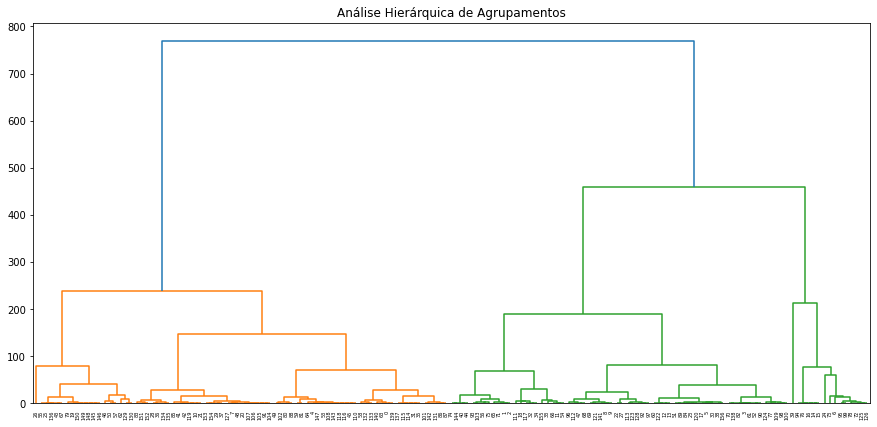

In [ ]:
#Fazer um Dendograma
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.title("Análise Hierárquica de Agrupamentos")

# Selecionando as variáveis de interesse: 'horsepower' e 'engine' e 
# criando uma análise de cluster com o método 'ward' e a distância 'euclidean'.
selected_data = veiculos[['horsepower', 'engine']]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

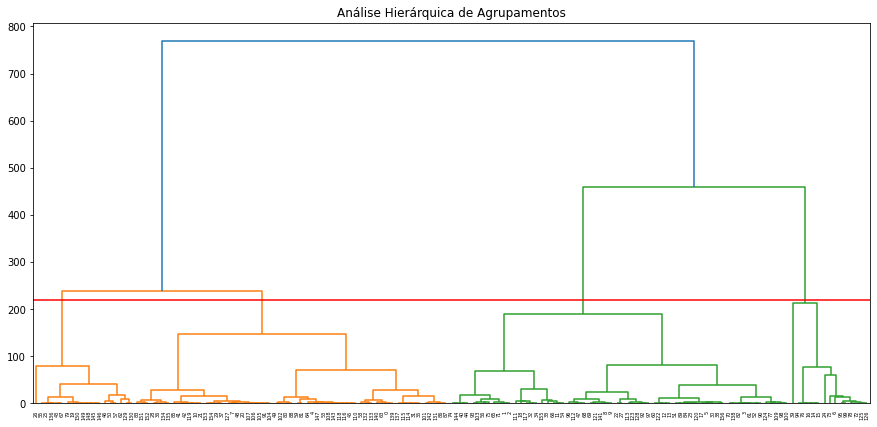

In [ ]:
# Mesma figura acima, mas com a 'linha de corte' representando a seleção do número de clusters.
plt.figure(figsize=(15, 7))
plt.title("Análise Hierárquica de Agrupamentos")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 220, color = 'r', linestyle = '-')

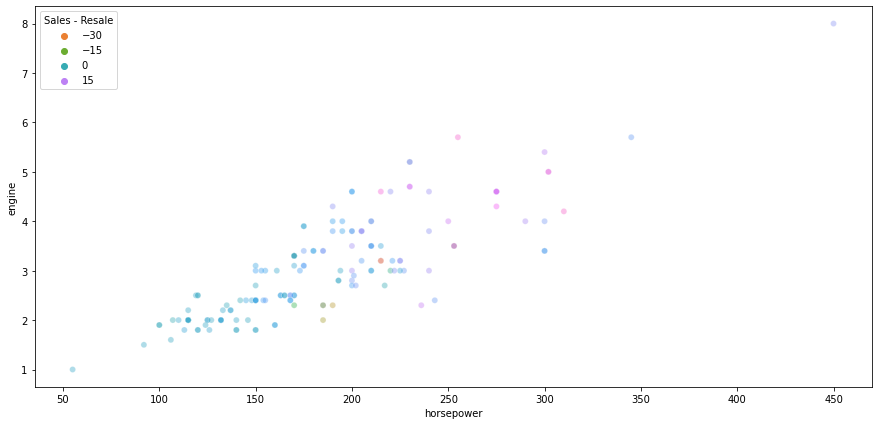

In [ ]:
# Gráfico de dispersão das variáveis escolhidas com 'Sales - Resale' separado por cores.
import seaborn as sns

plt.figure(figsize=(15,7))
sns.scatterplot(x='horsepower', y='engine', hue='Sales - Resale', palette='husl', alpha=0.4, data=veiculos)
plt.show()

In [ ]:
# Criação de uma análise de cluster aglomerativa (4 clusters, distância 'euclidean', método 'ward')
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_

array([1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 3, 1, 1,
       2, 2, 0, 3, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 1, 3,
       2, 1, 3, 2, 1, 1, 3, 2, 2, 1, 2, 3, 2, 3, 1, 1, 2, 2, 3, 1, 1, 2,
       2, 3, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 3, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 1,
       1, 2, 2])

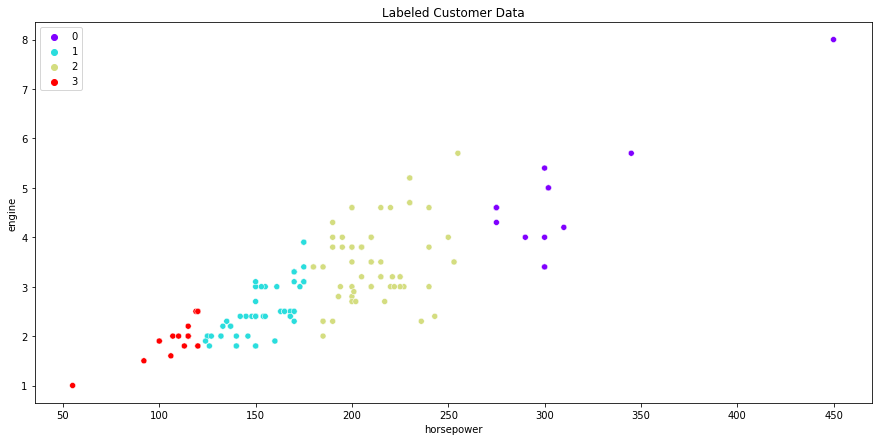

In [ ]:
# Gráfico de dispersão das variáveis escolhidas com os grupos (clusters) separado por cores.
data_labels = clustering_model.labels_
plt.figure(figsize=(15,7))
sns.scatterplot(x='horsepower', 
                y='engine', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')
plt.show()

In [ ]:
# Incluir a classificação como uma nova coluna ('cluster') na tabela
veiculos['cluster'] = data_labels
veiculos.head()

,Montadora,Modelo,sales,resale,price,engine,horsepower,width,length,curb_wgt,fuel_cap,fuel_effi_mpg,Sales - Resale,cluster
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,67.3,172.4,2.639,13.2,28.0,5.140,1
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,70.3,192.9,3.517,17.2,25.0,8.525,2
2,Acura,CL,14.114,18.225,32.40,3.2,225.0,70.6,192.0,3.470,17.2,26.0,14.175,2
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,71.4,196.6,3.850,18.0,22.0,12.275,2
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,68.2,178.0,2.998,16.4,27.0,1.735,1


In [ ]:
# ANOVA (one-way) para 'Sales - Resale' à partir dos clusters
!pip install pingouin

import pingouin as pg

pg.anova(data=veiculos, dv='Sales - Resale', between='cluster', detailed=True).round(3)


,Source,SS,DF,MS,F,p-unc,np2
0,cluster,1401.687,3,467.229,8.076,0.0,0.137
1,Within,8851.846,153,57.855,NaN,NaN,NaN


In [ ]:
# Teste Post-hoc para ver se há diferença entre cada grupo.
pg.pairwise_tests(data=veiculos, dv='Sales - Resale', between='cluster', padjust='none')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,cluster,0,1,False,True,7.193199,18.226232,two-sided,9.998897e-07,1.375e+07,2.437634
1,cluster,0,2,False,True,4.204016,50.562440,two-sided,1.068575e-04,285.521,0.766517
2,cluster,0,3,False,True,8.894152,15.982441,two-sided,1.378636e-07,1.738e+07,3.321830
3,cluster,1,2,False,True,-1.307913,78.152906,two-sided,1.947370e-01,0.416,-0.227055
4,cluster,1,3,False,True,3.259773,72.590277,two-sided,1.698767e-03,19.815,0.573296
5,cluster,2,3,False,True,2.700764,69.931444,two-sided,8.671584e-03,5.323,0.389505


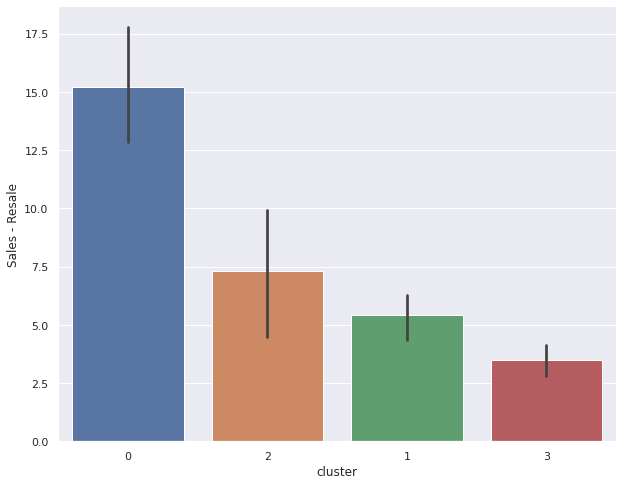

In [ ]:
# Gráfico de barras mostrando a diferença de 'Sales - Resale' por grupo.
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.barplot(data=veiculos, x='cluster', y='Sales - Resale', order=[0,2,1,3])
plt.show()

# Atividade


Repita a análise acima, separando em 5 grupos (Dendrograma com linha de corte = 10000). 

Utilize o método de Maior Distância ou Ligação Completa ('complete')

Utilize a distância Quadrática euclidiana ('sqeuclidean')

Compare os dois modelos em relação à capacidade de venda - revenda.

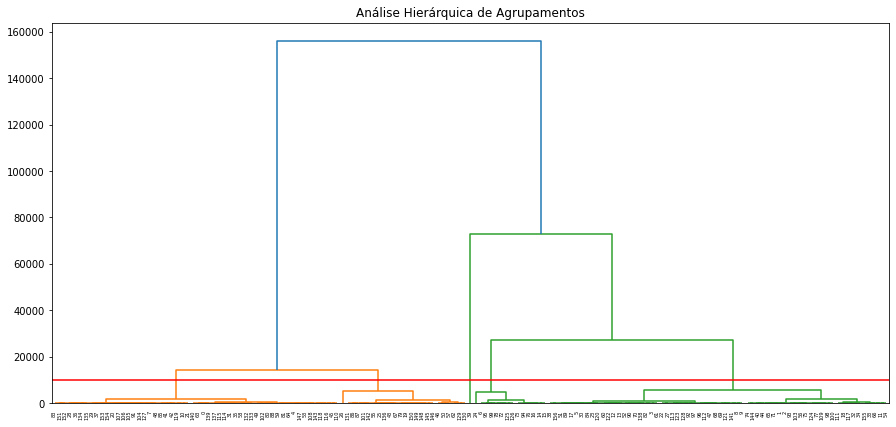

In [ ]:
#Fazer um Dendograma com a linha de corte em 10000

plt.figure(figsize=(15, 7))
plt.title("Análise Hierárquica de Agrupamentos")

# Selecionando as variáveis de interesse: 'horsepower' e 'engine' e 
# criando uma análise de cluster com o método 'ward' e a distância 'euclidean'.
selected_data = veiculos[['horsepower', 'engine']]
clusters = shc.linkage(selected_data, 
            method='complete', 
            metric= 'sqeuclidean')
shc.dendrogram(clusters)
plt.axhline(y = 10000, color = 'r', linestyle = '-')

In [ ]:
# Criação de uma análise de cluster aglomerativa (5 clusters, distância 'sqeuclidean', método 'complete')

clustering_model_2 = AgglomerativeClustering(n_clusters=5, affinity='sqeuclidean', linkage='complete')
clustering_model_2.fit(selected_data)
clustering_model_2.labels_


array([4, 0, 0, 0, 4, 0, 3, 4, 0, 0, 4, 0, 0, 0, 3, 3, 3, 0, 0, 1, 4, 4,
       0, 0, 3, 1, 1, 0, 4, 4, 0, 4, 0, 0, 0, 4, 4, 4, 0, 2, 0, 4, 4, 1,
       0, 4, 1, 0, 4, 4, 1, 0, 0, 4, 0, 1, 0, 1, 4, 4, 0, 0, 1, 4, 4, 0,
       0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 1, 4, 4, 0, 4, 0, 4, 1, 1,
       4, 0, 0, 4, 0, 0, 3, 3, 0, 0, 0, 3, 0, 1, 4, 0, 4, 4, 4, 4, 4, 0,
       4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 3, 3, 4, 0, 1, 1, 1,
       4, 4, 4, 4, 1, 4, 0, 4, 4, 0, 1, 4, 0, 1, 1, 4, 1, 1, 1, 4, 4, 4,
       4, 0, 0])

In [ ]:
# Incluir a classificação como uma nova coluna ('cluster_2') na tabela
cl_labels = clustering_model_2.labels_
veiculos['cluster_2'] = cl_labels
veiculos.head()

,Montadora,Modelo,sales,resale,price,engine,horsepower,width,length,curb_wgt,fuel_cap,fuel_effi_mpg,Sales - Resale,cluster_2
0,Acura,Integra,16.919,16.360,21.50,1.8,140.0,67.3,172.4,2.639,13.2,28.0,5.140,4
1,Acura,TL,39.384,19.875,28.40,3.2,225.0,70.3,192.9,3.517,17.2,25.0,8.525,0
2,Acura,CL,14.114,18.225,32.40,3.2,225.0,70.6,192.0,3.470,17.2,26.0,14.175,0
3,Acura,RL,8.588,29.725,42.00,3.5,210.0,71.4,196.6,3.850,18.0,22.0,12.275,0
4,Audi,A4,20.397,22.255,23.99,1.8,150.0,68.2,178.0,2.998,16.4,27.0,1.735,4


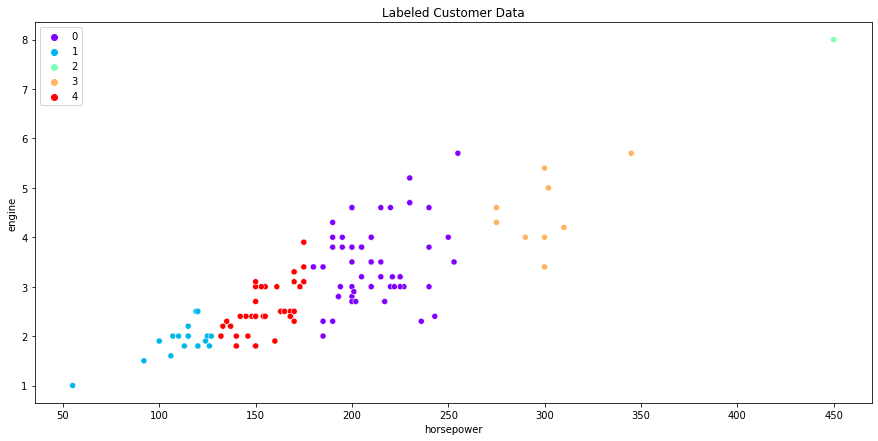

In [ ]:
# Gráfico de dispersão das variáveis escolhidas com os grupos (clusters) separado por cores.
plt.figure(figsize=(15,7))
sns.scatterplot(x='horsepower', 
                y='engine', 
                data=selected_data, 
                hue=cl_labels,
                palette="rainbow").set_title('Labeled Customer Data')
plt.show()

In [ ]:
!pip install pingouin

# Importar bibliotecas
import pingouin as pg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 83.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=a726019e90aeb209e960778d75d5774abc477c1b5d6e7ad2b1708d79f246acc8
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=aae9cb7285222d88accdc00a5f636af9e2945dad79787ec2550b3b30e85de251
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [ ]:
# ANOVA (one-way) para 'Sales - Resale' à partir dos novos clusters
pg.anova(data=veiculos, dv='Sales - Resale', between='cluster_2', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,cluster_2,1420.024080,4,355.006020,6.108662,0.000138,0.138491
1,Within,8833.508399,152,58.115187,NaN,NaN,NaN


In [ ]:
# Teste Post-hoc para ver se há diferença entre cada grupo.
pg.pairwise_tests(data=veiculos, dv='Sales - Resale', between='cluster_2', padjust='none')

/usr/local/lib/python3.8/dist-packages/pingouin/parametric.py:257: RuntimeWarning: Degrees of freedom <= 0 for slice
  vx, vy = x.var(ddof=1), y.var(ddof=1)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/pingouin/effsize.py:803: RuntimeWarning: Degrees of freedom <= 0 for slice
  poolsd = np.sqrt(((nx - 1) * x.var(ddof=1) + (ny - 1) * y.var(ddof=1)) / dof)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,cluster_2,0,1,False,True,2.567833,69.468087,two-sided,1.238788e-02,3.943,0.380292
1,cluster_2,0,2,False,True,-2.852101,63.000000,two-sided,5.867019e-03,5.436,-0.356513
2,cluster_2,0,3,False,True,-4.260555,44.977992,two-sided,1.027760e-04,333.921,-0.789544
3,cluster_2,0,4,False,True,1.235316,80.395775,two-sided,2.203105e-01,0.39,0.212067
4,cluster_2,1,2,False,True,-23.551419,23.000000,two-sided,1.333582e-17,3.222e+14,-4.807413
5,cluster_2,1,3,False,True,-8.603345,14.522964,two-sided,4.430195e-07,2.152e+07,-3.553413
6,cluster_2,1,4,False,True,-2.959230,75.720996,two-sided,4.114515e-03,9.414,-0.541217
7,cluster_2,2,3,False,True,NaN,1.000000,two-sided,NaN,nan,NaN
8,cluster_2,2,4,False,True,NaN,1.000000,two-sided,NaN,nan,NaN
9,cluster_2,3,4,False,True,6.975403,17.183356,two-sided,2.107893e-06,4.002e+06,2.416162


Cluster 2 não mostra significância pois (provavelmente) só tem um objeto no grupo (insuficiente para a análise).

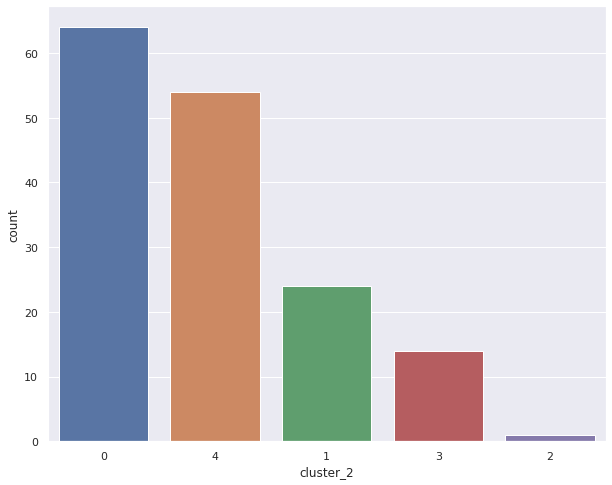

In [ ]:
# Verificar número de objetos em cada grupo
plt.figure(figsize=(10, 8))
sns.set_theme(style='darkgrid')
ax = sns.countplot(data = veiculos, x='cluster_2', order=[0,4,1,3,2])
plt.show()

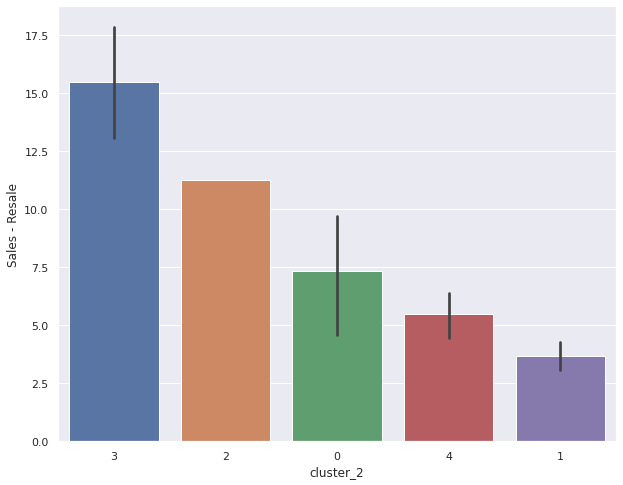

In [ ]:
# Gráfico de barras mostrando a diferença de 'Sales - Resale' por grupo.
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.barplot(data=veiculos, x='cluster_2', y='Sales - Resale', order=[3,2,0,4, 1])
plt.show()

# Exemplo de Análise de Cluster Não-Hierárquico

In [ ]:
!pip install pingouin
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
import statsmodels.formula.api as smf

In [ ]:
# Criar arrays para as variáveis preditoras e variável dependente
y = veiculos['Sales - Resale'].values # Variável dependente
X = veiculos[['horsepower', 'engine']].values # Variáveis preditoras

- https://realpython.com/k-means-clustering-python/
- https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

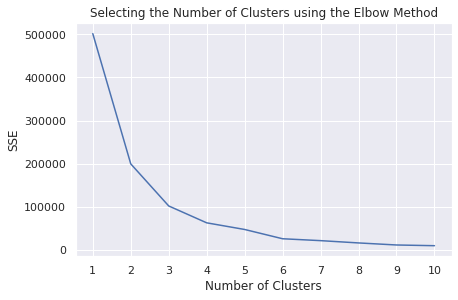

In [ ]:
sns.set()
plt.plot(range(1, 11), sse)
plt.title('Selecting the Number of Clusters using the Elbow Method')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.elbow

3

In [ ]:
# Classificar em agrupamentos com 7 vizinhanças
neigh = KNeighborsRegressor(n_neighbors=7)

In [ ]:
# Ajustar classificador
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=7)

In [ ]:
neigh.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# Retorna o R2 do modelo
neigh.score(X, y)

0.44669259257624594

In [ ]:
A = neigh.kneighbors_graph(X)
A.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
print(neigh.fit(X, y))

KNeighborsRegressor(n_neighbors=7)
